In [1]:
%load_ext rpy2.ipython

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [4]:
%%R

library(readr)
library(tidyr)
library(tibble)
library(car)
library(outliers)
library(corrplot)
library(mice)
library(nortest)
library(ggplot2)
library(dplyr)
library(gridExtra)
library(nnet)

In [26]:
%%R

df <- read.csv('StudentsPerformance.csv', header=TRUE)

# 1. Продемонстрировать применение для проверки различных гипотез и различных доверительных уровней (0.9, 0.95, 0.99) следующих критериев: 
### a. Стьюдента, включая односторонние варианты, когда проверяемая нулевая гипотеза заключается в том, что одно из сравниваемых средних значений больше (или меньше) другого. Реализовать оценку мощности критериев при заданном объеме выборки или определения объема выборки для достижения заданной мощности;

In [5]:
%%R

df_1 <- rnorm(100, 0, 1)
df_2 <- rnorm(300, 1, 3)
df_3 <- rnorm(1000, 0, 5)

In [6]:
%%R

print(t.test(df_1, df_2, conf.level=0.9, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_1 and df_2
t = -4.7024, df = 393.1, p-value = 3.564e-06
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -1.239266 -0.595848
sample estimates:
 mean of x  mean of y 
0.01769903 0.93525607 



In [7]:
%%R

print(t.test(df_1, df_3, conf.level=0.9, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_1 and df_3
t = -0.21796, df = 890.99, p-value = 0.8275
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -0.3409718  0.2612542
sample estimates:
 mean of x  mean of y 
0.01769903 0.05755784 



In [8]:
%%R

print(t.test(df_3, df_2, conf.level=0.9, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_3 and df_2
t = -3.7006, df = 840.2, p-value = 0.0002291
alternative hypothesis: true difference in means is not equal to 0
90 percent confidence interval:
 -1.2682457 -0.4871508
sample estimates:
 mean of x  mean of y 
0.05755784 0.93525607 



In [9]:
%%R

print(t.test(df_2, df_3, conf.level=0.9, alternative='greater'))


	Welch Two Sample t-test

data:  df_2 and df_3
t = 3.7006, df = 840.2, p-value = 0.0001145
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 0.5735081       Inf
sample estimates:
 mean of x  mean of y 
0.93525607 0.05755784 



In [10]:
%%R

print(t.test(df_2, df_1, conf.level=0.9, alternative='greater'))


	Welch Two Sample t-test

data:  df_2 and df_1
t = 4.7024, df = 393.1, p-value = 1.782e-06
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 0.6670743       Inf
sample estimates:
 mean of x  mean of y 
0.93525607 0.01769903 



In [11]:
%%R

print(t.test(df_1, df_3, conf.level=0.9, alternative='greater'))


	Welch Two Sample t-test

data:  df_1 and df_3
t = -0.21796, df = 890.99, p-value = 0.5862
alternative hypothesis: true difference in means is greater than 0
90 percent confidence interval:
 -0.2743944        Inf
sample estimates:
 mean of x  mean of y 
0.01769903 0.05755784 



In [12]:
%%R

print(t.test(df_1, df_2, conf.level=0.95, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_1 and df_2
t = -4.7024, df = 393.1, p-value = 3.564e-06
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3011747 -0.5339394
sample estimates:
 mean of x  mean of y 
0.01769903 0.93525607 



In [13]:
%%R

print(t.test(df_1, df_3, conf.level=0.95, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_1 and df_3
t = -0.21796, df = 890.99, p-value = 0.8275
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.3987716  0.3190540
sample estimates:
 mean of x  mean of y 
0.01769903 0.05755784 



In [14]:
%%R

print(t.test(df_3, df_2, conf.level=0.95, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_3 and df_2
t = -3.7006, df = 840.2, p-value = 0.0002291
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3432217 -0.4121747
sample estimates:
 mean of x  mean of y 
0.05755784 0.93525607 



In [15]:
%%R

print(t.test(df_1, df_2, conf.level=0.95, alternative='greater'))


	Welch Two Sample t-test

data:  df_1 and df_2
t = -4.7024, df = 393.1, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.239266       Inf
sample estimates:
 mean of x  mean of y 
0.01769903 0.93525607 



In [16]:
%%R

print(t.test(df_1, df_3, conf.level=0.95, alternative='greater'))


	Welch Two Sample t-test

data:  df_1 and df_3
t = -0.21796, df = 890.99, p-value = 0.5862
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -0.3409718        Inf
sample estimates:
 mean of x  mean of y 
0.01769903 0.05755784 



In [17]:
%%R

print(t.test(df_3, df_2, conf.level=0.95, alternative='greater'))


	Welch Two Sample t-test

data:  df_3 and df_2
t = -3.7006, df = 840.2, p-value = 0.9999
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -1.268246       Inf
sample estimates:
 mean of x  mean of y 
0.05755784 0.93525607 



In [18]:
%%R

print(t.test(df_1, df_2, conf.level=0.99, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_1 and df_2
t = -4.7024, df = 393.1, p-value = 3.564e-06
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -1.4226155 -0.4124985
sample estimates:
 mean of x  mean of y 
0.01769903 0.93525607 



In [19]:
%%R

print(t.test(df_1, df_2, conf.level=0.99, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_1 and df_2
t = -4.7024, df = 393.1, p-value = 3.564e-06
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -1.4226155 -0.4124985
sample estimates:
 mean of x  mean of y 
0.01769903 0.93525607 



In [20]:
%%R

print(t.test(df_1, df_2, conf.level=0.99, alternative='two.sided'))


	Welch Two Sample t-test

data:  df_1 and df_2
t = -4.7024, df = 393.1, p-value = 3.564e-06
alternative hypothesis: true difference in means is not equal to 0
99 percent confidence interval:
 -1.4226155 -0.4124985
sample estimates:
 mean of x  mean of y 
0.01769903 0.93525607 



In [21]:
%%R

print(t.test(df_2, df_3, conf.level=0.99, alternative='greater'))


	Welch Two Sample t-test

data:  df_2 and df_3
t = 3.7006, df = 840.2, p-value = 0.0001145
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 0.3248939       Inf
sample estimates:
 mean of x  mean of y 
0.93525607 0.05755784 



In [22]:
%%R

print(t.test(df_2, df_1, conf.level=0.99, alternative='greater'))


	Welch Two Sample t-test

data:  df_2 and df_1
t = 4.7024, df = 393.1, p-value = 1.782e-06
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 0.4617718       Inf
sample estimates:
 mean of x  mean of y 
0.93525607 0.01769903 



In [23]:
%%R

print(t.test(df_1, df_3, conf.level=0.99, alternative='greater'))


	Welch Two Sample t-test

data:  df_1 and df_3
t = -0.21796, df = 890.99, p-value = 0.5862
alternative hypothesis: true difference in means is greater than 0
99 percent confidence interval:
 -0.4660526        Inf
sample estimates:
 mean of x  mean of y 
0.01769903 0.05755784 



### b. Уилкоксона-Манна-Уитни (ранговые);

In [28]:
%%R

males <- df[df$gender == 'male', 'math.score']
females <- df[df$gender == 'female', 'math.score']

wilcox_result <- wilcox.test(males, females, alternative = "two.sided", exact = FALSE)

print(paste("U =", wilcox_result$statistic, "p-value =", round(wilcox_result$p.value, 4)))

if (wilcox_result$p.value < 0.05) {
  print("Difference between groups is statistically significant")
} else {
  print("No statistically significant differences")
}

[1] "U = 147907.5 p-value = 0"
[1] "Difference between groups is statistically significant"


In [29]:
%%R

males <- df[df$gender == 'male', 'reading.score']
females <- df[df$gender == 'female', 'reading.score']

wilcox_result <- wilcox.test(males, females, alternative = "greater", exact = FALSE)

print(paste("U =", wilcox_result$statistic, "p-value =", round(wilcox_result$p.value, 4)))

if (wilcox_result$p.value < 0.05) {
  print("Difference between groups is statistically significant")
} else {
  print("No statistically significant differences")
}

[1] "U = 89168 p-value = 1"
[1] "No statistically significant differences"


### c. Фишера, Левене, Бартлетта, Флигнера-Килина (проверка гипотез об однородности дисперсий).

In [30]:
%%R

df_1 <- rnorm(100, 0, 1)
df_2 <- rnorm(200, 1, 1)
df_3 <- rnorm(300, 0, 5)

In [31]:
%%R

print(var.test(df_2, df_3))
print(var.test(df_2, df_1))
print(var.test(df_1, df_3))


	F test to compare two variances

data:  df_2 and df_3
F = 0.047347, num df = 199, denom df = 299, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.03684020 0.06125208
sample estimates:
ratio of variances 
        0.04734721 


	F test to compare two variances

data:  df_2 and df_1
F = 0.98047, num df = 199, denom df = 99, p-value = 0.8943
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.689232 1.367266
sample estimates:
ratio of variances 
         0.9804677 


	F test to compare two variances

data:  df_1 and df_3
F = 0.04829, num df = 99, denom df = 299, p-value < 2.2e-16
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.03543179 0.06758198
sample estimates:
ratio of variances 
        0.04829043 



2. Критерий Левене

In [33]:
%%R

df_1 <- df$math.score
df_2 <- df$reading.score
df_3 <- df$writing.score

group_1_2 <- factor(rep(c("math", "reading"), c(length(df_1), length(df_2))))
group_1_3 <- factor(rep(c("math", "writing"), c(length(df_1), length(df_3))))
group_2_3 <- factor(rep(c("reading", "writing"), c(length(df_2), length(df_3))))

print(leveneTest(c(df_1, df_2), group_1_2))
print(leveneTest(c(df_1, df_3), group_1_3))
print(leveneTest(c(df_2, df_3), group_2_3))

Levene's Test for Homogeneity of Variance (center = median)
        Df F value Pr(>F)
group    1  0.4268 0.5136
      1998               
Levene's Test for Homogeneity of Variance (center = median)
        Df F value Pr(>F)
group    1  0.1499 0.6987
      1998               
Levene's Test for Homogeneity of Variance (center = median)
        Df F value Pr(>F)
group    1  1.1158 0.2909
      1998               


3. Критерий Бартлетта

In [39]:
%%R

df_1 <- rnorm(100, 0, 1)
df_2 <- rnorm(200, 1, 1)
df_3 <- rnorm(300, 0, 5)

group_1_2 <- factor(rep(c("N(0,1)", "N(1,1)"), c(length(df_1), length(df_2))))
group_1_3 <- factor(rep(c("N(0,1)", "N(0,5)"), c(length(df_1), length(df_3))))
group_2_3 <- factor(rep(c("N(1,1)", "N(0,5)"), c(length(df_2), length(df_3))))

print(bartlett.test(c(df_1, df_2), group_1_2))
print(bartlett.test(c(df_1, df_3), group_1_3))
print(bartlett.test(c(df_2, df_3), group_2_3))


	Bartlett test of homogeneity of variances

data:  c(df_1, df_2) and group_1_2
Bartlett's K-squared = 0.86289, df = 1, p-value = 0.3529


	Bartlett test of homogeneity of variances

data:  c(df_1, df_3) and group_1_3
Bartlett's K-squared = 209.09, df = 1, p-value < 2.2e-16


	Bartlett test of homogeneity of variances

data:  c(df_2, df_3) and group_2_3
Bartlett's K-squared = 368.13, df = 1, p-value < 2.2e-16



4. Критерий Флигнера-Килина

In [40]:
%%R

df_1 <- df$math.score
df_2 <- df$reading.score
df_3 <- df$writing.score

group_1_2 <- factor(rep(c("math", "reading"), c(length(df_1), length(df_2))))
group_1_3 <- factor(rep(c("math", "writing"), c(length(df_1), length(df_3))))
group_2_3 <- factor(rep(c("reading", "writing"), c(length(df_2), length(df_3))))

print(fligner.test(c(df_1, df_2), group_1_2))
print(fligner.test(c(df_1, df_3), group_1_3))
print(fligner.test(c(df_2, df_3), group_2_3))


	Fligner-Killeen test of homogeneity of variances

data:  c(df_1, df_2) and group_1_2
Fligner-Killeen:med chi-squared = 0.44849, df = 1, p-value = 0.5031


	Fligner-Killeen test of homogeneity of variances

data:  c(df_1, df_3) and group_1_3
Fligner-Killeen:med chi-squared = 0.14471, df = 1, p-value = 0.7036


	Fligner-Killeen test of homogeneity of variances

data:  c(df_2, df_3) and group_2_3
Fligner-Killeen:med chi-squared = 1.2196, df = 1, p-value = 0.2694



# 2. Исследовать корреляционные взаимосвязи в данных с помощью коэффициентов корреляции Пирсона, Спирмена и Кендалла.

### 1. Коэффициент корреляции Пирсона

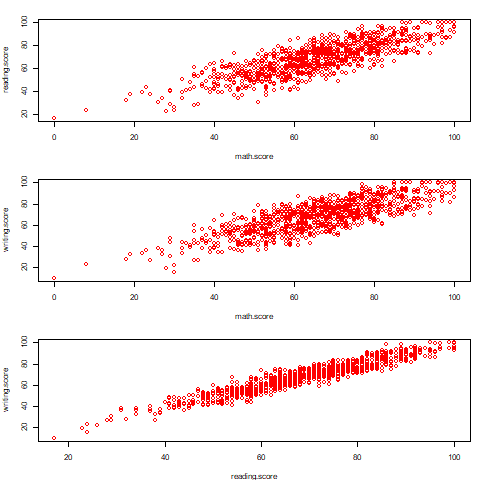

In [60]:
%%R
columns_for_print <- c('math.score', 'reading.score', 'writing.score')
count <- 0
par(mfrow = c(3, 1), mar = c(4, 4, 2, 1))

for (i in 1:(length(columns_for_print) - 1)) {
    for (j in (i + 1):length(columns_for_print)) {
        count <- count + 1
        first <- columns_for_print[i]
        second <- columns_for_print[j]
        plot(df[[first]], df[[second]], col = "red", xlab = first, ylab = second)
    }
}

In [59]:
%%R

for (i in 1:(length(columns_for_print) - 1)) {
    for (j in (i + 1):length(columns_for_print)) {
        first <- columns_for_print[i]
        second <- columns_for_print[j]
        data_1 <- df[[first]]
        data_2 <- df[[second]]
        cor <- cor.test(data_1, data_2, method = "pearson")
        print(paste(first, second, "cor =", cor$estimate,  "p-value =", cor$p.value))
    }
}

[1] "math.score reading.score cor = 0.817579663672054 p-value = 1.78775310990551e-241"
[1] "math.score writing.score cor = 0.802642045949808 p-value = 3.37602704256779e-226"
[1] "reading.score writing.score cor = 0.954598077146248 p-value = 0"


### 2. Коэффициент корреляции Спирмена

In [52]:
%%R


for (i in 1:(length(columns_for_print) - 1)) {
  for (j in (i + 1):length(columns_for_print)) {
    first <- columns_for_print[i]
    second <- columns_for_print[j]
    df_1 <- df[[first]]
    df_2 <- df[[second]]
    cor_result <- cor.test(df_1, df_2, method = "spearman")
    cat(first, "vs", second, ": rho =", cor_result$estimate, 
        "p-value =", cor_result$p.value, "\n")
  }
}

math.score vs 

reading.score : rho = 0.8040639 p-value = 1.353851e-227 
math.score vs writing.score : rho = 0.7783386 p-value = 5.853059e-204 
reading.score vs writing.score : rho = 0.9489525 p-value = 0 


R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xc5 in position 1: invalid continuation byte <traceback object at 0x00000146CE32EE00>
R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xc5 in position 1: invalid continuation byte <traceback object at 0x00000146CE32F600>
R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xc5 in position 1: invalid continuation byte <traceback object at 0x00000146CE32E700>


In addition: Warning messages:
1: In cor.test.default(df_1, df_2, method = "spearman") :
 2: In cor.test.default(df_1, df_2, method = "spearman") :
 3: In cor.test.default(df_1, df_2, method = "spearman") :
 

### 3. Коэффициент корреляции Кендалла

In [58]:
%%R

for (i in 1:(length(columns_for_print) - 1)) {
    for (j in (i + 1):length(columns_for_print)) {
        first <- columns_for_print[i]
        second <- columns_for_print[j]
        data_1 <- df[[first]]
        data_2 <- df[[second]]
        cor <- cor.test(data_1, data_2, method = "kendall")
        print(paste(first, second, "cor =", cor$estimate,  "p-value =", cor$p.value))
    }
}

[1] "math.score reading.score cor = 0.61743151149693 p-value = 4.92711233188778e-181"
[1] "math.score writing.score cor = 0.591066790997394 p-value = 3.13855997742374e-166"
[1] "reading.score writing.score cor = 0.820057542756282 p-value = 7.46579633036833e-318"


# 3. Продемонстрировать использование методов хи-квадрат, точного теста Фишера, теста МакНемара, Кохрана-Мантеля-Хензеля.

### 1. Метод $\chi ^2$

In [57]:
%%R
chisq.test(df$math.score, df$reading.score)

R callback write-console: <class 'UnicodeDecodeError'> 'utf-8' codec can't decode byte 0xe0 in position 1: invalid continuation byte <traceback object at 0x00000146CF4469C0>



	Pearson's Chi-squared test

data:  df$math.score and df$reading.score
X-squared = 13447, df = 5680, p-value < 2.2e-16



In addition: Warning message:
In chisq.test(df$math.score, df$reading.score) :
 

### 2. Точный тест Фишера

In [62]:
%%R


print(fisher.test(df$gender, df$lunch))
print(fisher.test(df$gender, df$test.preparation.course))
print(fisher.test(df$test.preparation.course, df$lunch))


	Fisher's Exact Test for Count Data

data:  df$gender and df$lunch
p-value = 0.509
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8366388 1.4297884
sample estimates:
odds ratio 
  1.093467 


	Fisher's Exact Test for Count Data

data:  df$gender and df$test.preparation.course
p-value = 0.895
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.7465866 1.2739441
sample estimates:
odds ratio 
 0.9751694 


	Fisher's Exact Test for Count Data

data:  df$test.preparation.course and df$lunch
p-value = 0.6295
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.8143676 1.4218062
sample estimates:
odds ratio 
  1.076815 



### 3. Тест МакНемара

In [63]:
%%R

before <- sample(c(0, 1), 100, replace=TRUE, prob=c(0.9, 0.1))
after1 <- sample(c(0, 1), 100, replace=TRUE, prob=c(0.91, 0.09))
after2 <- sample(c(0, 1), 100, replace=TRUE, prob=c(0.5, 0.5))

print(mcnemar.test(table(before, after1)))
print(mcnemar.test(table(before, after2)))


	McNemar's Chi-squared test with continuity correction

data:  table(before, after1)
McNemar's chi-squared = 0.94118, df = 1, p-value = 0.332


	McNemar's Chi-squared test with continuity correction

data:  table(before, after2)
McNemar's chi-squared = 33.581, df = 1, p-value = 6.834e-09



### 4. Тест Кохрана-Мантеля-Хензеля

In [ ]:
%%R


df$math_pass <- as.integer(df$math.score >= 50)
df$reading_pass <- as.integer(df$reading.score >= 50)

In [66]:
%%R


mantelhaen.test(table(df$math_pass, df$reading_pass, df$gender))


	Mantel-Haenszel chi-squared test with continuity correction

data:  table(df$math_pass, df$reading_pass, df$gender)
Mantel-Haenszel X-squared = 259.95, df = 1, p-value < 2.2e-16
alternative hypothesis: true common odds ratio is not equal to 1
95 percent confidence interval:
 21.16733 73.21927
sample estimates:
common odds ratio 
         39.36821 



# 4. Проверить наличие мультиколлинеарности в данных с помощью корреляционной матрицы и фактора инфляции дисперсии.

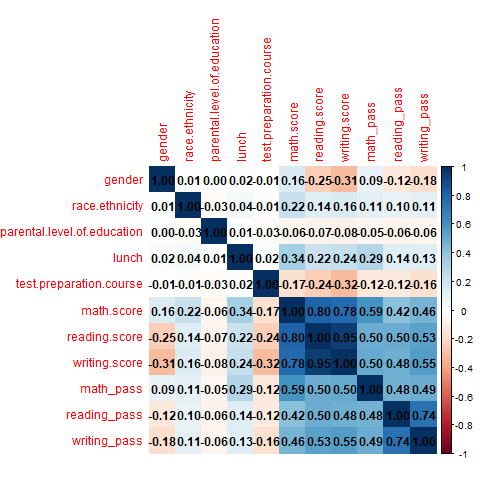

In [88]:
%%R

ds_to_cor <- df

categorical_cols <- c("gender", "race.ethnicity", "parental.level.of.education", "lunch", "test.preparation.course")

for (col in categorical_cols) {
  df_to_cor[[col]] <- as.numeric(factor(df_to_cor[[col]]))
}
cor_matrix <- cor(df_to_cor, method = "spearman")
corrplot(cor_matrix, method = "color", addCoef.col = "black")

### 2. Фактор инфляции дисперсии

In [93]:
%%R

df <- read.csv('StudentsPerformance.csv', header=TRUE)
df_to_vif <- df

categorical_cols <- c("gender", "race.ethnicity", "parental.level.of.education", "lunch", "test.preparation.course")

for (col in categorical_cols) {
  df_to_vif[[col]] <- as.numeric(factor(df_to_vif[[col]]))
}

df_to_vif <- data.frame(lapply(df_to_vif, as.numeric))

vif_results <- vif(lm(math.score ~ ., data = df_to_vif))

vif_df <- data.frame(
  Variable = names(vif_results),
  VIF = vif_results
)

print("Variance Inflation Factors (VIF):")
print(vif_df)

[1] "Variance Inflation Factors (VIF):"
                                               Variable       VIF
gender                                           gender  1.176024
race.ethnicity                           race.ethnicity  1.037243
parental.level.of.education parental.level.of.education  1.014805
lunch                                             lunch  1.096057
test.preparation.course         test.preparation.course  1.208995
reading.score                             reading.score 12.256525
writing.score                             writing.score 13.756686


# 5. Исследовать зависимости в данных с помощью дисперсионного анализа.

In [95]:
%%R

males <- df$math.score[df$gender == 'male']
females <- df$math.score[df$gender == 'female']

anova_result <- aov(math.score ~ gender, data = df)
summary_result <- summary(anova_result)

f_stat <- summary_result[[1]]$`F value`[1]
p_value <- summary_result[[1]]$`Pr(>F)`[1]

cat("F-statistic =", round(f_stat, 4), "p-value =", round(p_value, 4), "\n")

F-statistic = 28.9793 p-value = 0 


# 6. Подогнать регрессионные модели (в том числе, нелинейные) к данным, а также оценить качество подобной аппроксимации.

In [113]:
%%R

ds_to_reg <- df

categorical_cols <- c("gender", "race.ethnicity", "parental.level.of.education", "lunch", "test.preparation.course")

for (col in categorical_cols) {
  df_to_cor[[col]] <- as.numeric(factor(df_to_cor[[col]]))
}

X <- ds_to_reg[, names(ds_to_reg) != "gender"]
y <- ds_to_reg$gender
train_index <- sample(1:nrow(X), 0.75 * nrow(X))
X_train <- X[train_index, ]
X_valid <- X[-train_index, ]
y_train <- y[train_index]
y_valid <- y[-train_index]
X_train_scaled <- scale(X_train)
X_valid_scaled <- scale(X_valid, center = attr(X_train_scaled, "scaled:center"), scale = attr(X_train_scaled, "scaled:scale"))
model <- multinom(as.factor(y_train) ~ ., data=as.data.frame(scale(X_train)), maxit=500, MaxNWts=10000, decay=1/100)
y_pred <- predict(model, as.data.frame(X_valid_scaled))
mean(y_pred == as.factor(y_valid))

# weights:  9 (8 variable)
initial  value 519.860385 
iter  10 value 195.431364
final  value 190.243052 
converged
[1] 0.916
